In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [3]:
city_df = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [4]:
city_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/2000,2/29/2000,...,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"253,690.00","255,517.00",...,"741,586.00","745,686.00","750,578.00","756,734.00","762,321.00","768,797.00","773,944.00","777,692.00","779,960.00","781,622.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"234,181.00","234,401.00",...,"924,019.00","928,991.00","937,936.00","953,874.00","973,168.00","990,391.00","992,337.00","992,630.00","978,196.00","966,595.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"109,068.00","109,079.00",...,"245,783.00","248,718.00","252,080.00","256,435.00","261,101.00","265,558.00","268,901.00","271,059.00","272,400.00","272,639.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"166,139.00","166,536.00",...,"302,821.00","305,104.00","306,404.00","308,303.00","309,649.00","312,487.00","314,663.00","315,910.00","315,587.00","315,429.00"
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,"114,794.00","114,975.00",...,"269,323.00","274,032.00","278,464.00","284,127.00","289,739.00","294,776.00","297,727.00","298,796.00","299,124.00","298,951.00"


In [5]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 9/30/2022
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [6]:
city_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '1/31/2000', '2/29/2000',
       ...
       '12/31/2021', '1/31/2022', '2/28/2022', '3/31/2022', '4/30/2022',
       '5/31/2022', '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022'],
      dtype='object', length=281)

In [7]:
fourcity = city_df['SizeRank'] <= 3

In [8]:
city_df = city_df.loc[fourcity]

# Convert Datetime into one Column

In [9]:
id_vars = city_df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [10]:
long_city = pd.melt(city_df, id_vars=id_vars, var_name='Date', value_name='Price')
long_city

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,1/31/2000,"253,690.00"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1/31/2000,"234,181.00"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1/31/2000,"109,068.00"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1/31/2000,"166,139.00"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2/29/2000,"255,517.00"
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,8/31/2022,"315,587.00"
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,9/30/2022,"781,622.00"
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,9/30/2022,"966,595.00"
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,9/30/2022,"272,639.00"


# Converting datetime Column into datetime type

In [11]:
long_city['Date'] = pd.to_datetime(long_city['Date'], format="%m/%d/%Y")
long_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Price       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


# Set datetime as index

In [12]:
long_city = long_city.set_index('Date')
long_city.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

# Resampling 

In [13]:
month_ts = long_city.groupby('RegionName').resample('M').last()['Price']
month_ts

RegionName  Date      
Chicago     2000-01-31   166,139.00
            2000-02-29   166,536.00
            2000-03-31   167,368.00
            2000-04-30   168,826.00
            2000-05-31   170,499.00
                            ...    
New York    2022-05-31   768,797.00
            2022-06-30   773,944.00
            2022-07-31   777,692.00
            2022-08-31   779,960.00
            2022-09-30   781,622.00
Name: Price, Length: 1092, dtype: float64

In [14]:
type(month_ts)

pandas.core.series.Series

In [15]:
month_ts.index

MultiIndex([( 'Chicago', '2000-01-31'),
            ( 'Chicago', '2000-02-29'),
            ( 'Chicago', '2000-03-31'),
            ( 'Chicago', '2000-04-30'),
            ( 'Chicago', '2000-05-31'),
            ( 'Chicago', '2000-06-30'),
            ( 'Chicago', '2000-07-31'),
            ( 'Chicago', '2000-08-31'),
            ( 'Chicago', '2000-09-30'),
            ( 'Chicago', '2000-10-31'),
            ...
            ('New York', '2021-12-31'),
            ('New York', '2022-01-31'),
            ('New York', '2022-02-28'),
            ('New York', '2022-03-31'),
            ('New York', '2022-04-30'),
            ('New York', '2022-05-31'),
            ('New York', '2022-06-30'),
            ('New York', '2022-07-31'),
            ('New York', '2022-08-31'),
            ('New York', '2022-09-30')],
           names=['RegionName', 'Date'], length=1092)

<AxesSubplot: xlabel='RegionName,Date'>

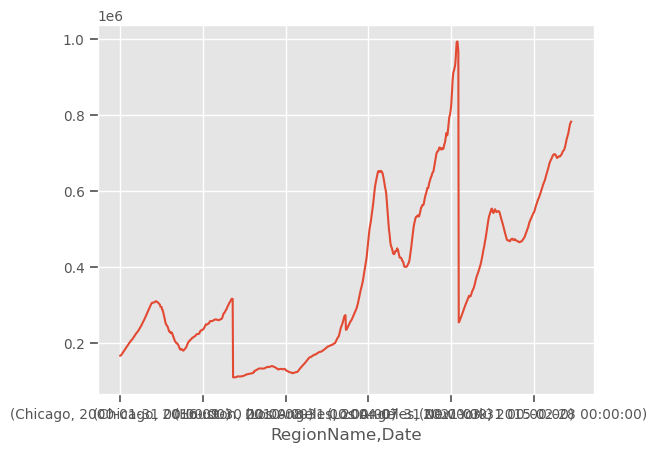

In [16]:
month_ts.plot()

In [17]:
city_unstacked = month_ts.unstack(0)
city_unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,"166,139.00","109,068.00","234,181.00","253,690.00"
2000-02-29,"166,536.00","109,079.00","234,401.00","255,517.00"
2000-03-31,"167,368.00","108,878.00","235,513.00","257,207.00"
2000-04-30,"168,826.00","108,881.00","237,589.00","260,310.00"
2000-05-31,"170,499.00","108,834.00","240,113.00","263,204.00"
...,...,...,...,...
2022-05-31,"312,487.00","265,558.00","990,391.00","768,797.00"
2022-06-30,"314,663.00","268,901.00","992,337.00","773,944.00"
2022-07-31,"315,910.00","271,059.00","992,630.00","777,692.00"


<AxesSubplot: xlabel='Date'>

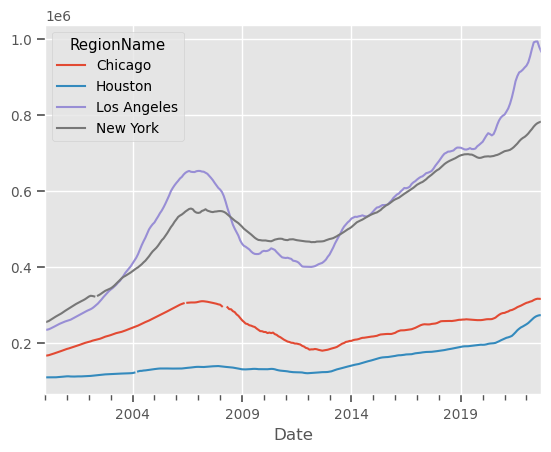

In [18]:
city_unstacked.plot()

# Selecting our TS for resampling demonstration

1. 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 

In [19]:
ts = city_unstacked.resample('A').last()

In [20]:
ts.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='A-DEC')

<AxesSubplot: xlabel='Date'>

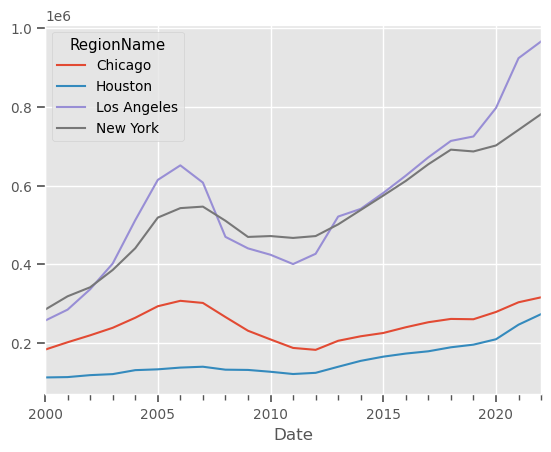

In [21]:
ts.plot()

In [29]:
ts.loc['2008-12']

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-31,"265,306.00","131,283.00","469,294.00","510,309.00"


We can see above that New York has the highest home value and Houston has the lowest home value.

2) How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

In [23]:
ts2 = city_unstacked.diff()

In [26]:
ts2.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=273, freq='M')

<AxesSubplot: xlabel='Date'>

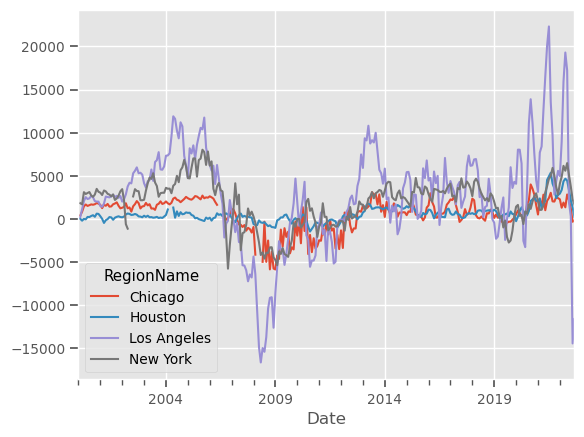

In [27]:
ts2.plot()

In [28]:
ts2.loc['2008-12']

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-31,"-5,753.00",-964.00,"-12,611.00","-4,458.00"
